In [381]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

In [382]:
df_trainingdata = pd.read_csv("distance_fare_data.csv")

In [383]:
df_trainingdata.head()

,Distance_km,Fare_price
0,37.454012,57.780894
1,95.071431,148.768414
2,73.199394,116.264454
3,59.865848,91.227016
4,15.601864,37.731669


In [384]:
distance_array = np.array(df_trainingdata["Distance_km"])

In [385]:
fare_array = np.array(df_trainingdata["Fare_price"])

In [386]:
def prediction(feature, weight, bias):
    y_hat = (weight*feature) + bias
    return y_hat

In [387]:
def Gradient_computation(Weight,bias):
    m = np.size(distance_array)
    bias_gradient = 0
    weight_gradient = 0
    for i in range(m):
        y_hat = prediction(distance_array[i],Weight,bias)
        error = y_hat - fare_array[i]
        bias_gradient = bias_gradient + error
        weight_gradient = weight_gradient + error*distance_array[i]
    bias_gradient/= m
    weight_gradient/= m
    return weight_gradient, bias_gradient


In [388]:
def Error_calc(Weight,bias):
    total_error = 0
    for i in range(np.size(fare_array)):
        Y_hat =  prediction(distance_array[i],Weight,bias)
        squarred_error = math.pow(fare_array[i] - Y_hat,2)
        total_error += squarred_error
    return total_error/(2*np.size(fare_array))

In [ ]:
def gradient_descent(iterations=20,learning_rate=0.0001):
    Weight = 2.56
    bias = 0.512
    cost_history = []
    for i in range(iterations):
        Weight_grad, bias_grad = Gradient_computation(Weight,bias)
        Weight = Weight - (learning_rate*Weight_grad)
        bias = bias - (learning_rate*bias_grad)
        new_cost = Error_calc(Weight,bias)
        cost_history.append(new_cost)
        if i%100 == 0:
            print(f"Cost after iteration {i+1} is {new_cost}")
    x_line = np.linspace(1,iterations,iterations)
    sns.lineplot(x = x_line, y = cost_history, color = "red", label = "error after every GD step" )
    plt.xlabel("Iterations")
    plt.ylabel("Error")
    plt.title("error reduction over iterations")
    plt.legend()
    plt.show()
    
    return Weight,bias
    

Cost after iteration 1 is 737.5791352383698


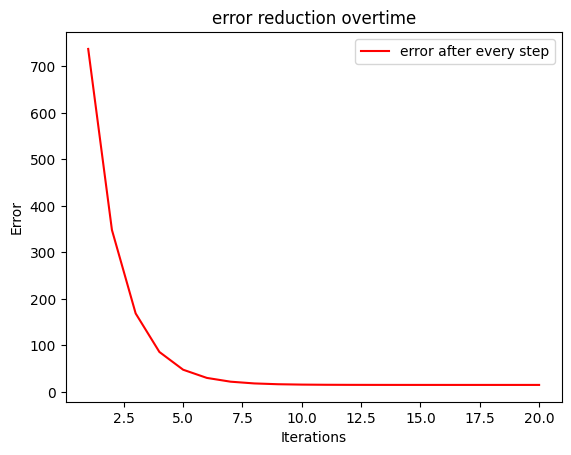

1.5723687922850609 0.49980953800234007


In [390]:
optimized_weight, optimized_bias = gradient_descent()
print(optimized_weight, optimized_bias)

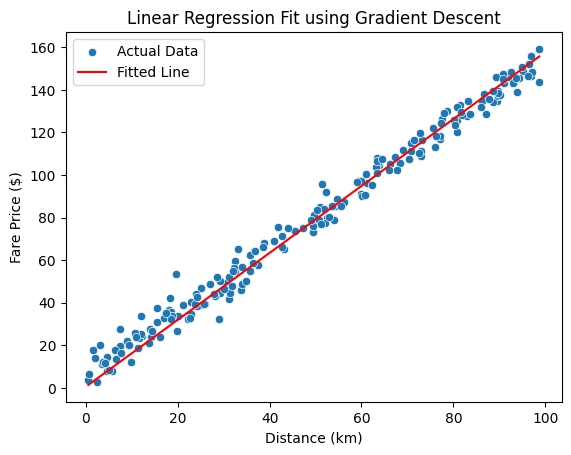

In [391]:
sns.scatterplot(x=distance_array, y=fare_array, label='Actual Data')
x_line = np.linspace(min(distance_array), max(distance_array), 100)
y_line = optimized_weight * x_line + optimized_bias

sns.lineplot(x=x_line, y=y_line, color='red', label='Fitted Line')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Price ($)')
plt.title('Linear Regression Fit using Gradient Descent')
plt.legend()
plt.show()

In [392]:
def predict_fare(x):
    target = prediction(x,optimized_weight, optimized_bias)
    print(f"the fare amount is \"{float(round(target,2))}\" dollars for \"{x}\" kilometers.")

In [393]:
predict_fare(4500)

the fare amount is "7076.16" dollars for "4500" kilometers.
